## 통계적 추정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3

'%.3f'

In [5]:
df = pd.read_csv('ch4_scores400.csv')
df.head()

,score
0,76
1,55
2,80
3,80
4,74


In [8]:
scores = np.array(df['score'])
scores[:5]

array([76, 55, 80, 80, 74], dtype=int64)

In [9]:
# 모집단의 평균, 분산

p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

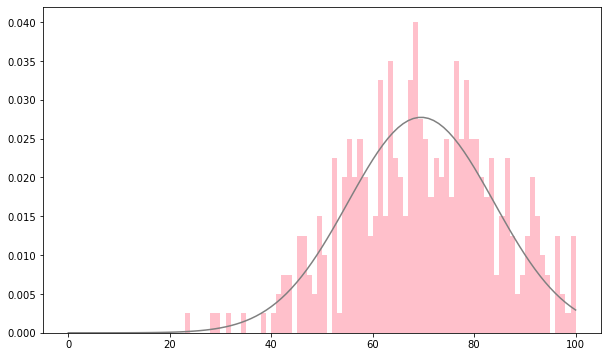

In [14]:
# 모집단의 분포 살펴보기
# 정규분포를 이룬다고 가정하여 추정하기

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))

ax.plot(xs, rv.pdf(xs), color = 'gray')
ax.hist(scores, bins = 100, range =(0,100), density = True, color = 'pink')

plt.show()

### 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 함
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 불편성임
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있음


In [15]:
# 무작위추출한 20명의 표본 추출

np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [18]:
# 무작위추출한 20명의 표본을 1만개 추출

np.random.seed(1111)
n_sample = 10000
samples = np.random.choice(scores, (n_sample, n))

In [30]:
# 5개의 표본을 뽑아 평균 확인해보기

for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean}')

1번째 표본평균: 67.0
2번째 표본평균: 72.85
3번째 표본평균: 69.2
4번째 표본평균: 64.45
5번째 표본평균: 72.65


In [31]:
# 표본크기가 20인 1만개 표본의 기댓값 확인해보기

sample_means = np.mean(samples, axis = 1)
np.mean(sample_means)

69.538

In [32]:
# 표본 크기 n이 100만개일 때 기댓값 확인해보기

samples2 = np.random.choice(scores, int(1e6))
np.mean(samples2)

69.547

In [34]:
# 5개의 표본을 뽑아 분산 확인해보기

for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 116.800
2번째 표본분산: 162.928
3번째 표본분산: 187.060
4번째 표본분산: 149.148
5번째 표본분산: 111.528


In [38]:
# 표본크기가 20인 1만개 표본의 분산 확인해보기

sample_vars = np.var(samples, axis = 1)
np.mean(sample_vars)

196.344

In [40]:
# 표본크기가 20인 1만개 표본의 '불편'분산 확인해보기

samples_u_vars = np.var(samples, axis = 1, ddof = 1)
np.mean(samples_u_vars)

206.678

In [41]:
# 표본 크기 n이 100만개일 때 '불편'분산 확인해보기

np.var(np.random.choice(scores, int(1e6)), ddof = 1)

206.657

In [43]:
u_var = np.var(sample, ddof = 1)
u_var

158.253

### 구간추정

- 구간추정을 100번 하더라도 모평균은 실제 값이 하나로 정해져있기 때문에 
- 신뢰구간 95%의 뜻은 <b>'동일한 방법으로 수차례 표본추출하여 구간추정을 하면 그 중 95%의 구간추정에는 모평균이 포함되어 있다'</b>임

In [97]:
df = pd.read_csv('ch4_scores400.csv')
scores = np.array(df['score'])

# 모집단의 평균, 분산
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

In [88]:
np.random.seed(0)


# 표본 수가 20개
n = 20
sample = np.random.choice(scores, n)
s_mean = np.mean(sample)


# 표본 집단 수가 10000개
samples = np.random.choice(scores, (10000, n))


# 표본 수가 1000000개
samples2 = np.random.choice(scores, int(1e6))

In [89]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025)*np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(p_var/n)

lcl, ucl

(64.100, 76.700)

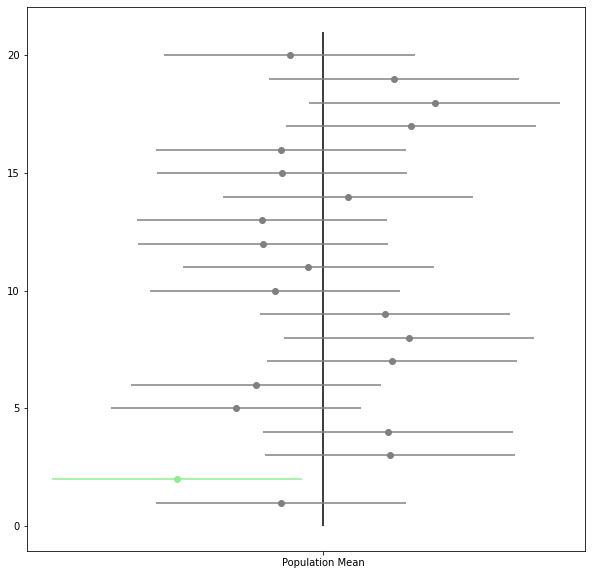

In [106]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21, color = 'black')

for i in range(n_samples):
    sample_ = samples[i+20]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025)*np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975)*np.sqrt(p_var/n)
    
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color = 'gray')
        ax.hlines(n_samples-i, lcl, ucl, color = 'gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color = 'lightgreen')
        ax.hlines(n_samples-i, lcl, ucl, color = 'lightgreen')
    
    ax.set_xticks([p_mean])
    ax.set_xticklabels(['Population Mean'])

plt.show()

#### 정규분포의 모분산 구간추정

#### 정규분포의 모평균 구간추정: 모분산을 모르는 경우

#### 베르누이분포의 모평균 구간추정

#### 포아송분포의 모평균 구간추정

#### 과제:
- 다음 용어를 예를 들어 설명하기
    - 불편성, 일치성, 불편분산
- 카이제곱분포, t분포가 구간 추정에 활용된 사례를 만들어 설명하기